In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
data=pd.read_csv('Covid19-usa.csv')
data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [90]:
data.shape

(58, 18)

In [91]:
data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [92]:
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [93]:
data['Recovered'].fillna(0,inplace=True)

In [94]:
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [95]:
data['Incident_Rate'].fillna((data['Confirmed']/100000),inplace=True)

In [96]:
data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,0.0,49.0,88888,0.000490,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [97]:
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [98]:
data['People_Hospitalized'].fillna(data['People_Hospitalized'].mean(),inplace=True)

In [99]:
data['People_Tested'].fillna(data['People_Tested'].mean(),inplace=True)

In [100]:
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            0
People_Hospitalized      0
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [101]:
data['Hospitalization_Rate'].fillna((data['People_Hospitalized']*100)/data['Confirmed'],inplace=True)

In [102]:
data.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     2
Long_                   2
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          1
UID                     0
ISO3                    0
Testing_Rate            2
Hospitalization_Rate    0
dtype: int64

In [103]:
data.dropna(axis=0,inplace=True)

In [104]:
data.shape

(55, 18)

In [105]:
data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,5.500000e+01,55.000000,55.000000
mean,37.769382,-83.662516,28212.745455,1698.836364,5351.127273,21162.781818,32.036364,403.435002,2.299576e+05,4897.454545,4.567409,7.789098e+07,3960.938317,667.424268
std,8.453768,48.840127,53614.101223,4178.550115,10607.048455,42148.607793,18.878720,402.735419,2.999399e+05,10150.301278,2.074273,2.201472e+07,1884.729897,3282.344530
min,13.444300,-157.498300,21.000000,2.000000,0.000000,2.000000,1.000000,38.082112,1.383000e+03,65.000000,1.101269,3.160000e+02,97.702058,3.248166
25%,34.905100,-99.611400,3834.500000,98.500000,37.000000,1076.000000,17.500000,158.533760,4.859600e+04,1291.500000,3.256718,8.400001e+07,2752.080259,9.950879
50%,39.063900,-86.902300,11528.000000,407.000000,1275.000000,6324.000000,31.000000,251.824349,1.422460e+05,4897.454545,4.415327,8.400003e+07,3492.893832,16.111235
75%,42.493100,-76.914450,31172.000000,1561.500000,4473.000000,19810.500000,45.500000,483.617754,2.817865e+05,4897.454545,5.508969,8.400004e+07,4863.746497,26.934958
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,78.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.400006e+07,11377.424693,23321.212121


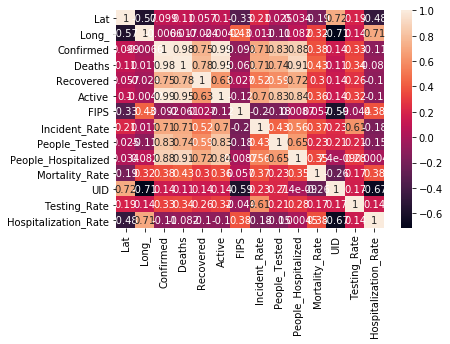

In [107]:
sns.heatmap(data.corr(),annot=True)

In [108]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [109]:
data=data[['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_'
       , 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate','Confirmed', 'Deaths']]

In [110]:
data

,Province_State,Country_Region,Last_Update,Lat,Long_,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed,Deaths
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,0.0,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860,13052,522
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,352.0,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,1221.310360,401,10
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,3773.0,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005,14906,747
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,3852.0,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584,5003,107
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,0.0,82500.0,6,217.646575,1380120.0,4897.454545,4.066421,84000006,USA,3492.893832,5.694913,85997,3497
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,3478.0,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,USA,2289.339188,17.348774,22797,1299
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,6264.0,29224.0,9,1094.357902,190718.0,10946.000000,9.044775,84000009,USA,5349.302875,28.054438,39017,3529
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,3965.0,3919.0,10,841.476990,45412.0,4897.454545,3.783256,84000010,USA,4663.552976,59.768789,8194,310
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,1059.0,6085.0,11,1069.927127,40419.0,4897.454545,5.390015,84000011,USA,5727.106946,64.858357,7551,407
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,0.0,45375.0,12,221.024217,771348.0,8934.000000,4.415327,84000012,USA,3591.383953,18.819911,47471,2096


In [111]:
data['Country_Region'].value_counts()

US    55
Name: Country_Region, dtype: int64

In [112]:
data.drop(['Country_Region'],axis=1,inplace=True)

In [113]:
data['ISO3'].value_counts()

USA    51
GUM     1
VIR     1
PRI     1
MNP     1
Name: ISO3, dtype: int64

In [114]:
data['Province_State'].value_counts()

Alaska                      1
Indiana                     1
Ohio                        1
South Carolina              1
Georgia                     1
Idaho                       1
Puerto Rico                 1
Missouri                    1
Michigan                    1
Alabama                     1
Pennsylvania                1
Utah                        1
Maryland                    1
Nebraska                    1
North Carolina              1
Florida                     1
Arizona                     1
Oklahoma                    1
Rhode Island                1
Colorado                    1
Minnesota                   1
South Dakota                1
Kansas                      1
Vermont                     1
New Mexico                  1
North Dakota                1
Illinois                    1
Wyoming                     1
Delaware                    1
New Hampshire               1
Massachusetts               1
Nevada                      1
Arkansas                    1
West Virgi

In [115]:
data['Last_Update'].value_counts()

2020-05-21 02:32:54    55
Name: Last_Update, dtype: int64

In [116]:
data.drop(['Last_Update'],axis=1,inplace=True)

In [117]:
data.drop(['Province_State'],axis=1,inplace=True)

In [118]:
data

,Lat,Long_,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed,Deaths
0,32.3182,-86.9023,0.0,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860,13052,522
1,61.3707,-152.4044,352.0,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,1221.310360,401,10
3,33.7298,-111.4312,3773.0,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005,14906,747
4,34.9697,-92.3731,3852.0,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584,5003,107
5,36.1162,-119.6816,0.0,82500.0,6,217.646575,1380120.0,4897.454545,4.066421,84000006,USA,3492.893832,5.694913,85997,3497
6,39.0598,-105.3111,3478.0,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,USA,2289.339188,17.348774,22797,1299
7,41.5978,-72.7554,6264.0,29224.0,9,1094.357902,190718.0,10946.000000,9.044775,84000009,USA,5349.302875,28.054438,39017,3529
8,39.3185,-75.5071,3965.0,3919.0,10,841.476990,45412.0,4897.454545,3.783256,84000010,USA,4663.552976,59.768789,8194,310
10,38.8974,-77.0268,1059.0,6085.0,11,1069.927127,40419.0,4897.454545,5.390015,84000011,USA,5727.106946,64.858357,7551,407
11,27.7663,-81.6868,0.0,45375.0,12,221.024217,771348.0,8934.000000,4.415327,84000012,USA,3591.383953,18.819911,47471,2096


In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ISO3']=le.fit_transform(data['ISO3'])

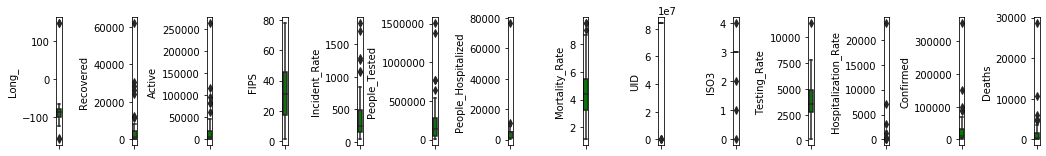

In [122]:
collist=data.columns.values
ncol=15
nrow=5
plt.figure(figsize=(ncol,10))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [123]:
from scipy.stats import zscore
z_sc=np.abs(zscore(data))
data=data.loc[(z_sc<3).all(axis=1)]

In [125]:
data.shape

(47, 15)

In [126]:
data.skew()

Lat                     0.255334
Long_                  -1.449041
Recovered               2.588811
Active                  2.379176
FIPS                    0.042193
Incident_Rate           1.593314
People_Tested           1.788602
People_Hospitalized     0.567672
Mortality_Rate          0.528123
UID                     0.042193
ISO3                    0.000000
Testing_Rate            1.196266
Hospitalization_Rate    5.300642
Confirmed               1.849613
Deaths                  2.001798
dtype: float64

In [132]:
from scipy.stats import boxcox
data['Recovered']=np.log1p(data['Recovered'])
data['Active']=np.log1p(data['Active'])
data['Incident_Rate']=np.log1p(data['Incident_Rate'])
data['People_Tested']=np.log1p(data['People_Tested'])
data['Testing_Rate']=np.log1p(data['Testing_Rate'])
data['Hospitalization_Rate']=np.log1p(data['Hospitalization_Rate'])
data['Confirmed']=np.log1p(data['Confirmed'])
data['Deaths']=np.log1p(data['Deaths'])




In [156]:
x=data.iloc[:,0:-2]
y=data.iloc[:,-1]
y2=data.iloc[:,-2:-1]

In [157]:
y

0     6.259581
1     2.397895
3     6.617403
4     4.682131
6     7.170120
7     8.169053
8     5.739793
10    6.011267
11    7.648263
12    7.437206
15    2.890372
16    4.356709
17    8.417594
18    7.531016
19    5.976351
20    5.313206
21    5.932245
22    7.866722
23    4.304065
24    7.661056
25    8.710620
26    8.529319
27    6.668228
28    6.347389
29    6.463029
30    2.833213
31    4.934474
32    5.934894
33    5.252273
35    5.648974
37    6.588926
38    3.912023
40    7.485492
41    5.703782
42    4.976734
43    8.470311
46    6.011267
47    3.850148
48    5.723585
49    7.263330
50    4.510860
51    4.007333
53    6.981006
54    6.945051
55    4.248495
56    6.177944
57    2.484907
Name: Deaths, dtype: float64

In [149]:
y2

,Confirmed
0,9.476773
1,5.996452
3,9.609586
4,8.517993
6,10.034428
7,10.571778
8,9.011279
10,8.929568
11,10.767895
12,10.591672


In [159]:
y.values.reshape(-1,1)
y.shape

(47,)

In [140]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def r2scoref(reg,x,y):
    max_r_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y2,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            r_state=r
            plt.scatter(x=y_test,y=y_pred)
    print('Maximum r2 score corresponding to random state',r_state,'is',max_r_score)
    return(r_state)

Maximum r2 score corresponding to random state 95 is 0.9994282554692206


95

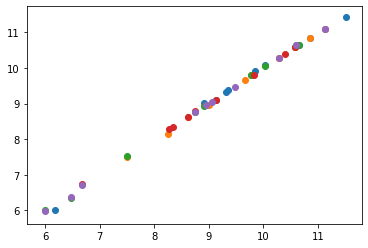

In [160]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r2scoref(lr,x,y2)

Maximum r2 score corresponding to random state 73 is 0.899998341778427


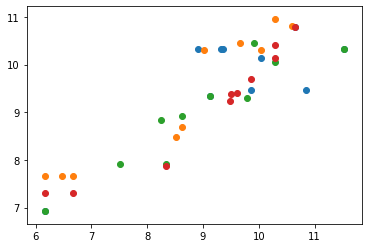

In [161]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
r_state=r2scoref(knr,x,y2)

Maximum r2 score corresponding to random state 95 is 0.9992236503344412


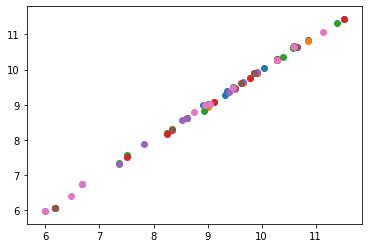

In [162]:
from sklearn.linear_model import Lasso
lso=Lasso(alpha=0.001)
r_state=r2scoref(lso,x,y2)

In [148]:
from sklearn.model_selection import cross_val_score
print('Mean r2_score for Linear regression is:',cross_val_score(lr,x,y2,cv=10,scoring="r2").mean())
print('Standard Deviation for Linear regression is :',cross_val_score(lr,x,y2,cv=5,scoring="r2").std())

Mean r2_score for KNR regression is: 0.9961218186250358
Standard Deviation for KNR regression is : 0.0009119337173673333


In [150]:
from sklearn.externals import joblib
joblib.dump(lr,'COVID_USA_Confirmed_Cases.pkl')

['COVID_USA_Confirmed_Cases.pkl']

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def r2scoref2(reg,x,y):
    max_r_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            r_state=r
            plt.scatter(x=y_test,y=y_pred)
    print('Maximum r2 score corresponding to random state',r_state,'is',max_r_score)
    return(r_state)

Maximum r2 score corresponding to random state 64 is 0.9963836511628641


64

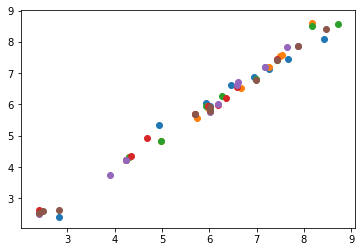

In [166]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r2scoref2(lr,x,y)

Maximum r2 score corresponding to random state 73 is 0.8701406401453529


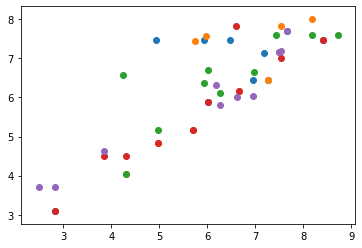

In [167]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
r_state=r2scoref2(knr,x,y)

Maximum r2 score corresponding to random state 72 is 0.9965988077180278


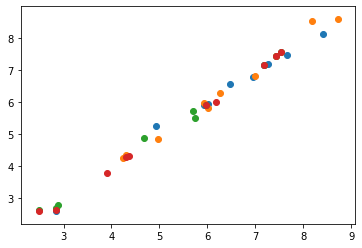

In [168]:
from sklearn.linear_model import Lasso
lso=Lasso(alpha=0.001)
r_state=r2scoref2(lso,x,y)

In [169]:
from sklearn.model_selection import cross_val_score
print('Mean r2_score for Linear regression is:',cross_val_score(lr,x,y,cv=10,scoring="r2").mean())
print('Standard Deviation for Linear regression is :',cross_val_score(lr,x,y,cv=5,scoring="r2").std())

Mean r2_score for Linear regression is: 0.97258308991847
Standard Deviation for Linear regression is : 0.004721363412069165


In [170]:
from sklearn.externals import joblib
joblib.dump(lr,'COVID_USA_Deaths_Cases.pkl')

['COVID_USA_Deaths_Cases.pkl']